In [16]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop


In [17]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [18]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [19]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [20]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [21]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [22]:
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [23]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [24]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [26]:
sample_training_images, _ = next(train_data_gen)

# Cek beberapa sampel untuk prediksi

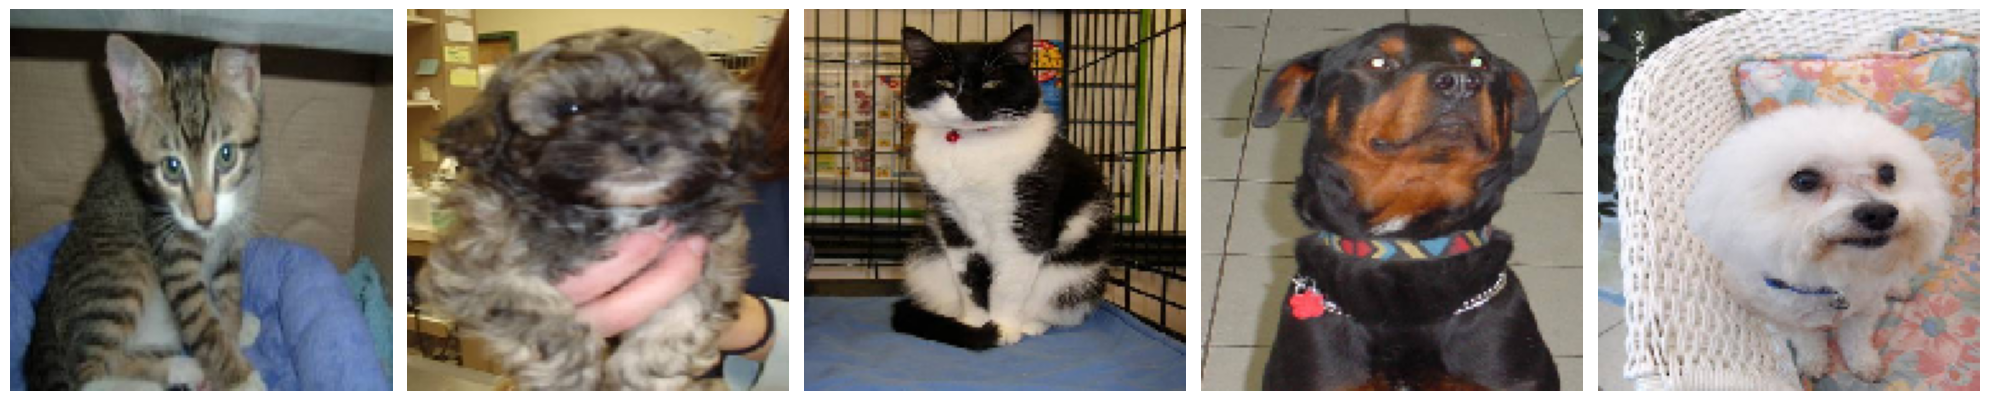

In [27]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(sample_training_images[:10])

In [28]:
# Arsitektur Model 1
model_1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [29]:
# Arsitektur Model 2
model_2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [30]:
# Model Compile 1: Adam optimizer
model_1.compile(optimizer=Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
# Model Compile 2: RMSprop optimizer dengan laju pembelajaran default
model_2.compile(optimizer=RMSprop(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    22,430,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,435,809 (85.59 MB)

 Trainable params: 22,435,809 (85.59 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,641,441 (40.59 MB)

 Trainable params: 10,641,441 (40.59 MB)

 Non-trainable params: 0 (0.00 B)

# Proses Learning

In [34]:
# Model Fit 1: 50 epochs
history_1 = model_1.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=50,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/50


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5090 - loss: 1.1720 - val_accuracy: 0.5982 - val_loss: 0.6773
Epoch 2/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6406 - loss: 0.6985

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.6406 - loss: 0.6985 - val_accuracy: 0.5769 - val_loss: 0.7070
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5168 - loss: 0.6689 - val_accuracy: 0.5234 - val_loss: 0.6613
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5078 - loss: 0.6617 - val_accuracy: 0.4712 - val_loss: 0.6559
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6077 - loss: 0.6233 - val_accuracy: 0.6395 - val_loss: 0.6029
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6562 - loss: 0.5522 - val_accuracy: 0.6058 - val_loss: 0.6355
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7259 - loss: 0.5207 - val_accuracy: 0.6161 - val_loss: 0.6202
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6953 - loss: 0.4855 - val_accuracy: 0.6154 - val_loss: 0.6421
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.7758 - loss: 0.4402 - val_accuracy: 0.7065 - val_loss: 0.564

In [41]:
# Model Fit 2: 100 epochs
history_2 = model_2.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4844 - loss: 0.7720 - val_accuracy: 0.5067 - val_loss: 0.6918
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4922 - loss: 0.6915

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4922 - loss: 0.6915 - val_accuracy: 0.4423 - val_loss: 0.6935
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5007 - loss: 0.6920 - val_accuracy: 0.4978 - val_loss: 0.6853
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5000 - loss: 0.6824 - val_accuracy: 0.5192 - val_loss: 0.6709
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5131 - loss: 0.6897 - val_accuracy: 0.4978 - val_loss: 0.6840
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4922 - loss: 0.6816 - val_accuracy: 0.5192 - val_loss: 0.6811
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5191 - loss: 0.6837 - val_accuracy: 0.5703 - val_loss: 0.7252
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5703 - loss: 0.7432 - val_accuracy: 0.5865 - val_loss: 0.6670
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5592 - loss: 0.6601 - val_accuracy: 0.6138 - val_loss:

# Evaluasi learning dan testing untuk grafik performance dan loss function

In [36]:
# Model 1
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

In [43]:
# Model 2
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

In [37]:
epochs_range_1 = range(50)  # Jumlah epochs Model 1

In [42]:

epochs_range_2 = range(100)  # Jumlah epochs Model 2

# Plot performance

Text(0.5, 1.0, 'Training and Validation Accuracy (Model 1)')

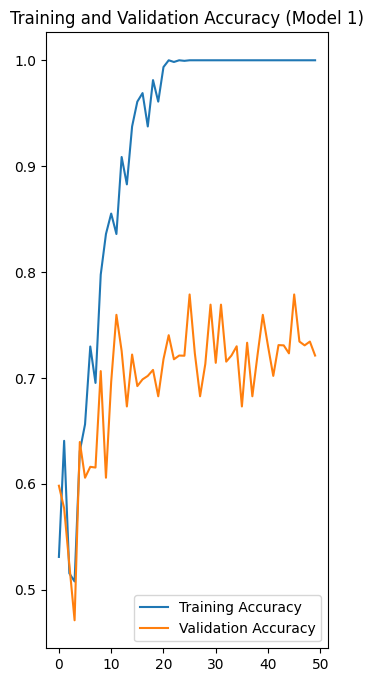

In [38]:
# Plot performance Model 1
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_1, acc_1, label='Training Accuracy')
plt.plot(epochs_range_1, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Model 1)')

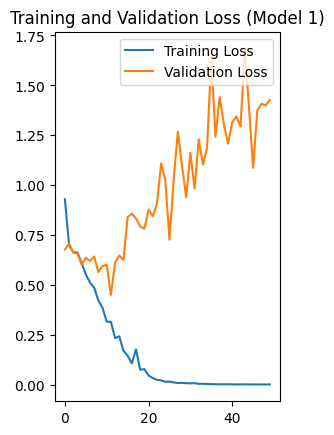

In [39]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range_1, loss_1, label='Training Loss')
plt.plot(epochs_range_1, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Model 1)')
plt.show()

In [40]:
test_loss, test_accuracy = model_1.evaluate(val_data_gen)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.7376 - loss: 1.3546
Test Accuracy: 0.7360000014305115
Test Loss: 1.4009206295013428


Text(0.5, 1.0, 'Training and Validation Accuracy (Model 2)')

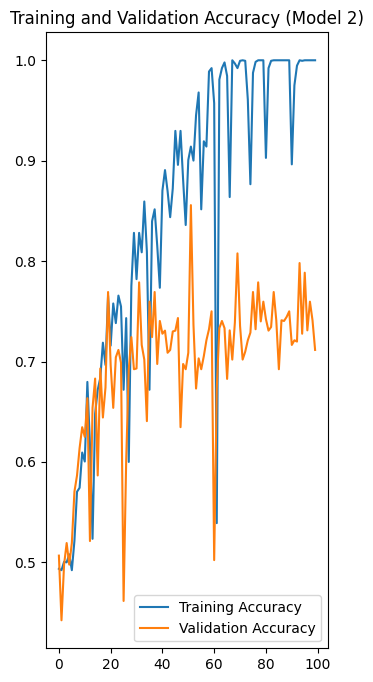

In [45]:
# Plot performance Model 2
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_2, acc_2, label='Training Accuracy')
plt.plot(epochs_range_2, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Model 2)')



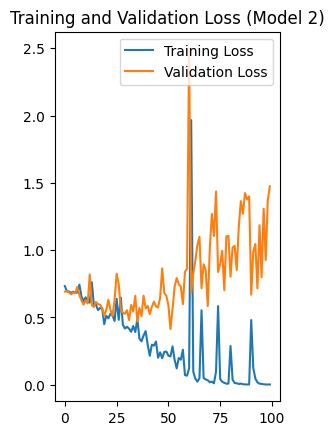

In [46]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range_2, loss_2, label='Training Loss')
plt.plot(epochs_range_2, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Model 2)')
plt.show()

In [47]:
test_loss, test_accuracy = model_2.evaluate(val_data_gen)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 753ms/step - accuracy: 0.7381 - loss: 1.3604
Test Accuracy: 0.7369999885559082
Test Loss: 1.3958470821380615
